# Определение перспективного тарифа для телеком-компании

## Описание работы

Я - аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Мне предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В моем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Исходные данные

Описание тарифов
Тариф «Смарт»

    Ежемесячная плата: 550 рублей
    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»

    Ежемесячная плата: 1950 рублей
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

*Примечание*
    
    «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
    Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

### План выполнения

Шаг 1. Открытие и изучение файлов исходных данных

Шаг 2. Подготовка данных

Шаг 3. Анализ данных

Шаг 4. Проверка гипотез

Шаг 5. Формулирование вывода

## Открытие и изучение файлов исходных данных

Мой основной инструмент — `pandas`. Я подключаю эту библиотеку. Также подключаю библиотеки `re`, `numpy`, `matplotlib`, `stats` и `warnings` - они понадобятся для моих исследований.

Дополнительно отключу предупреждения.

In [1]:
import pandas as pd                # импорт библиотеки pandas
#pd.set_option('display.float_format', '{:,.1f}'.format) # округление данных из таблицы describe()

import re                          # импорт библиотеки регулярных выражений re
import numpy as np                 # импорт библиотеки numpy
import matplotlib.pyplot as plt    # импорт библиотеки matplotlib
import warnings as wg              # импорт библиотеки warnings
wg.filterwarnings('ignore')
from scipy import stats as st

Далее осуществляю чтение файлов и сохраняю его в переменных. Вывожу на экран по первые пять строк таблиц.

In [2]:
# чтение файлов с данными в зависимости от их расположения
try:
    calls = pd.read_csv('C:/Users/datasets/calls.csv') # локальный путь
    internet = pd.read_csv('C:/Users/datasets/internet.csv')
    messages = pd.read_csv('C:/Users/datasets/messages.csv')
    tariffs = pd.read_csv('C:/Users/datasets/tariffs.csv')
    users = pd.read_csv('C:/Users/datasets/users.csv') 
except:
    calls = pd.read_csv('/datasets/calls.csv')         # серверный путь
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')

calls.name = 'calls'  
internet.name = 'internet' 
messages.name = 'messages' 
tariffs.name = 'tariffs' 
users.name = 'users' 

Получу общую информацию о таблицах, с которыми мне предстоит работать:
- общую информацию по столбцам;
- предварительную статистическую информации о количественных данных (использую метод `describe()` из библиотеки регулярных выражений `re` для переменных типа `float` и `int`. Он поможет сразу увидеть некоторые проблемы в данных).
    Для числовых переменных я оценю среднее, минимальное и максимальное значения, чтобы установить, в каком диапазоне лежат данные. Процентиль на предварительном этапе оцениватьне не буду.
- предварительную статистическую информации о категориальных переменных (`bool` и `object`) также методом `describe()`.

In [3]:
tables = [calls, internet, messages, tariffs, users]

for table in tables:
    print('ТАБЛИЦА', table.name)
    display(table.head())
    print(table.info())
    display(round(table.describe(percentiles = [], include = ['float', 'int'])))
    display(round(table.describe(percentiles = [], include = ['bool', 'object'])))
    print() 

ТАБЛИЦА calls


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,duration,user_id
count,202607.0,202607.0
mean,7.0,1254.0
std,6.0,145.0
min,0.0,1000.0
50%,6.0,1260.0
max,38.0,1499.0


,id,call_date
count,202607,202607
unique,202607,365
top,1313_196,2018-12-31
freq,1,1435



ТАБЛИЦА internet


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,Unnamed: 0,mb_used,user_id
count,149396.0,149396.0,149396.0
mean,74698.0,370.0,1252.0
std,43127.0,278.0,144.0
min,0.0,0.0,1000.0
50%,74698.0,348.0,1251.0
max,149395.0,1725.0,1499.0


,id,session_date
count,149396,149396
unique,149396,365
top,1102_112,2018-12-31
freq,1,1057



ТАБЛИЦА messages


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,user_id
count,123036.0
mean,1257.0
std,144.0
min,1000.0
50%,1271.0
max,1499.0


,id,message_date
count,123036,123036
unique,123036,364
top,1102_112,2018-12-31
freq,1,859



ТАБЛИЦА tariffs


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.0,2.0,2.0,2.0,2.0,2.0,2.0
mean,525.0,23040.0,1750.0,1250.0,175.0,2.0,2.0
std,672.0,10861.0,1768.0,990.0,35.0,1.0,1.0
min,50.0,15360.0,500.0,550.0,150.0,1.0,1.0
50%,525.0,23040.0,1750.0,1250.0,175.0,2.0,2.0
max,1000.0,30720.0,3000.0,1950.0,200.0,3.0,3.0


,tariff_name
count,2
unique,2
top,ultra
freq,1



ТАБЛИЦА users


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age
count,500.0,500.0
mean,1250.0,47.0
std,144.0,17.0
min,1000.0,18.0
50%,1250.0,46.0
max,1499.0,75.0


,churn_date,city,first_name,last_name,reg_date,tariff
count,38,500,500,500,500,500
unique,33,76,246,419,270,2
top,2018-12-09,Москва,Радим,Андреенко,2018-05-28,smart
freq,2,99,6,5,8,351


### Выводы по разделу

Итак, данные получены, отображены и предварительно пранализированы.
Всего имеем 5 таблиц:
- Таблица `calls` - данные о совершенных звонках за период:
    
    Содежит 4 столбца:
        * id — уникальный номер звонка
        * call_date — дата звонка
        * duration — длительность звонка в минутах
        * user_id — идентификатор пользователя, сделавшего звонок.
    Обнаружены следущие ошибки:
        * тип данных в столбце `user_id` - `int64`, хотя столбец по логике должен содержать категориальные переменные;
        * тип данных в столбце `call_date` - `object`, должен быть `datetime64`;
        * название `id` однозначено не описывает содержимое столбца, поэтому его необходимо переименовать;
        * в столбце `duration` очень настораживает значение стандартного отклонения - велико, значит, в наборе данных могут втречаться серьёзные аномалии или выбросы, необходимо проанализировать.

По таблице `describe()` выявлены нулевые значения продолжительности звонков, но это не является ошибкой, т.к. звонки с нулевой продолжительностью - это пропущенные звонки. Статистическую информациию о столбце `user_id` в расчет принимать не буду, т.к. это должен быть строковый объект и данные по нему - некорректно оценивать, как по количественному значению.  

- Таблица `internet` - данные об интернет-сессиях за период:

    Содежит 5 столбцов:
        * Unnamed
        * id — уникальный номер сессии
        * mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
        * session_date — дата интернет-сессии
        * user_id — идентификатор пользователя
        
    Обнаружены следущие ошибки:
        * неинформативный столбец `Unnamed: 0`, который, исходя из данных таблицы `describe()`, содержит порядковый номер строки;
        * тип данных в столбце `user_id` - `int64`, хотя столбец по логике должен содержать категориальные переменные;
        * тип данных в столбце `session_date` - `object`, должен быть `datetime64`;
        * название `id` однозначено не описывает содержимое столбца, поэтому его необходимо переименовать;
        * в столбце `mb_used` велико значение стандартного отклонения поэтому также необходимо проверить данные на наличие аномалий или выбросов;
        * обнаружены нулевые продолжительности сессий в столбце `mb_used` - нужно проанализировать. 

- Таблица `messages` - данные о коротких сообщениях за период:

    Содежит 3 столбца:
        * id — уникальный номер сообщения
        * message_date — дата сообщения
        * user_id — идентификатор пользователя, отправившего сообщение
        
    Обнаружены следущие ошибки:
        * тип данных в столбце `user_id` - `int64`, хотя столбец по логике должен содержать категориальные переменные;
        * название `id` однозначено не описывает содержимое столбца, поэтому его необходимо переименовать;
        * тип данных в столбце `message_date` - `object`, должен быть `datetime64`.

- Таблица `tariffs` - данные о тарифах компании:

    Содежит 8 столбцов:
        * tariff_name — название тарифа
        * rub_monthly_fee — ежемесячная абонентская плата в рублях
        * minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
        * messages_included — количество сообщений в месяц, включённых в абонентскую плату
        * mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
        * rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
        * rub_per_message — стоимость отправки сообщения сверх тарифного пакета
        * rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
        
Ошибок в данных не обнаружено, значения таблицы `describe()` для данной таблицы являются неинформативными, т.к. строк в таблице всего 2, слишком маленькая выборка для оценки показателей, поэтому зашкаливают значения отклонений и пр.

- Таблица `users` - данные о пользователях:

    Содежит 8 столбцов:
        * user_id — уникальный идентификатор пользователя
        * first_name — имя пользователя
        * last_name — фамилия пользователя
        * age — возраст пользователя (годы)
        * reg_date — дата подключения тарифа (день, месяц, год)
        * churn_date — дата прекращения пользования тарифом
        * city — город проживания пользователя
        * tarif — название тарифного плана
        
    Обнаружены следущие ошибки:
        * тип данных в столбце `user_id` - `int64`, хотя столбец по логике должен содержать категориальные переменные;
        * тип данных в столбцах `reg_date` и `churn_date` - `object`, должен быть `datetime64`;
        * несоответствие названия столбца `tarif` с таблицей `tariffs`, в которой столбец называется `tarif_name`.

Обнаружены пропущенные значения в столбце `churn_date`, однако это не является ошибкой - если значение пропущено, то тариф ещё действовал на момент выгрузки данных. В столбцах всех остальных таблиц пропущенных значений не обнаружено, также не выявлено нарушений стилей названий столбцов.

## Подготовка данных

### Приведение типов данных

В данном разделе изменю во всех таблицах приведу тип столбца `user_id` к строковому, а типы столбцов `call_date`, `session_date`, `message_date`, `reg_date` и `churn_date` - к формату даты.

In [4]:
print('Исходный тип данных в столбце user_id для таблиц:')
print(calls.name, '-', calls['user_id'].dtypes)
print(internet.name, '-', internet['user_id'].dtypes)
print(messages.name, '-', messages['user_id'].dtypes)
print(users.name, '-', users['user_id'].dtypes)

# Изменение типов столбца user_id 2018-12-31
calls['user_id'] = calls['user_id'].astype('object')
internet['user_id'] = internet['user_id'].astype('object')
messages['user_id'] = messages['user_id'].astype('object')
users['user_id'] = users['user_id'].astype('object')

print()

# Проверка
print('После изменения типа данных в столбце user_id для таблиц:')
print(calls.name, '-', calls['user_id'].dtypes)
print(internet.name, '-', internet['user_id'].dtypes)
print(messages.name, '-', messages['user_id'].dtypes)
print(users.name, '-', users['user_id'].dtypes)

print()

print('Исходный тип данных в столбцах:')
print('call_date', '-', calls['call_date'].dtypes)
print('session_date', '-', internet['session_date'].dtypes)
print('message_date', '-', messages['message_date'].dtypes)
print('reg_date', '-', users['reg_date'].dtypes)
print('churn_date', '-', users['churn_date'].dtypes)

# Приведение столбцов call_date, session_date, message_date, reg_date и churn_date в формат даты 
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

print()

# Проверка
print('После изменения типов данных в столбцах:')
print('call_date', '-', calls['call_date'].dtypes)
print('session_date', '-', internet['session_date'].dtypes)
print('message_date', '-', messages['message_date'].dtypes)
print('reg_date', '-', users['reg_date'].dtypes)
print('churn_date', '-', users['churn_date'].dtypes)

Исходный тип данных в столбце user_id для таблиц:
calls - int64
internet - int64
messages - int64
users - int64

После изменения типа данных в столбце user_id для таблиц:
calls - object
internet - object
messages - object
users - object

Исходный тип данных в столбцах:
call_date - object
session_date - object
message_date - object
reg_date - object
churn_date - object

После изменения типов данных в столбцах:
call_date - datetime64[ns]
session_date - datetime64[ns]
message_date - datetime64[ns]
reg_date - datetime64[ns]
churn_date - datetime64[ns]


#### Выводы по разделу

В данном разделе во всех таблицах тип столбца user_id приведен к строковому, а типы столбцов call_date, session_date, message_date, reg_date и churn_date - к формату даты.

### Исправление ошибок в данных

#### Переименование столбцов

Переименую столбцы `id` в таблицах `calls`, `internet` и `messages` в соответствии с их содержимым:

In [5]:
calls = calls.rename(columns={'id': 'call_id'})
internet = internet.rename(columns={'id': 'session_id'})
messages = messages.rename(columns={'id': 'message_id'})
users = users.rename(columns={'tariff': 'tariff_name'})

#### Удаление столбцов

Удалю неинформативный столбец `Unnamed: 0` из таблицы `internet`:

In [6]:
internet.drop('Unnamed: 0', axis=1, inplace=True)

#### Обработка данных в столбце mb_used

Проанализирую значения объёма потраченного за сессию интернет-трафика (в мегабайтах) в таблице `internet` - выведу построю гистограмму распределения значений, а также диаграмму размаха:

count    149396.0
mean        370.0
std         278.0
min           0.0
25%         138.0
50%         348.0
75%         560.0
max        1725.0
Name: mb_used, dtype: float64


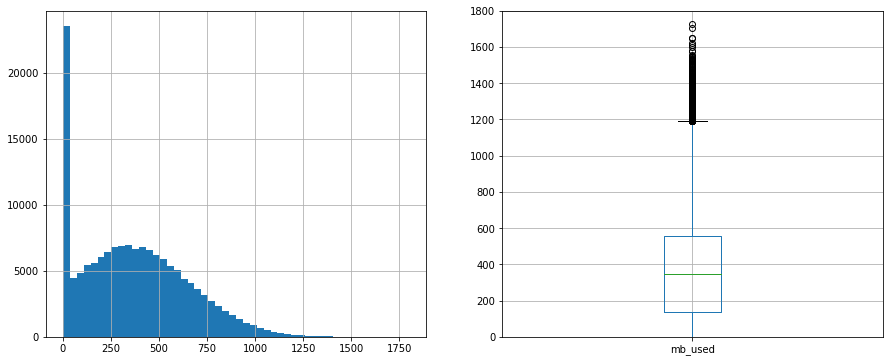

In [7]:
print(round(internet['mb_used'].describe()))

fig, axes = plt.subplots(1,2,figsize=(15,6))
internet['mb_used'].hist(bins=50, range=(0, 1800), ax=axes[0])
internet.boxplot(('mb_used'), ax=axes[1])
plt.ylim(0, 1800);

In [8]:
print('Кол-во записей с нулевыми интернет-сессиями -', len(internet.query('mb_used == 0')))
print('Доля нулевых интернет-сессий составляет {:.1%}'.format(len(internet.query("mb_used == 0")) / len(internet)))

Кол-во записей с нулевыми интернет-сессиями - 19598
Доля нулевых интернет-сессий составляет 13.1%


Можно сделать предположение, что нулевые сессии - это те сессии, в которых объем трафика за сессию меньше определенного порогового значения, и фиксируется системой как 0. Проверю, какое минимальное значение принимает значение (кроме 0):

In [9]:
internet.query('mb_used != 0').sort_values(by='mb_used').head()

,session_id,mb_used,session_date,user_id
15944,1055_402,0.03,2018-06-15,1055
85722,1291_278,0.04,2018-08-10,1291
108198,1370_3,0.06,2018-07-18,1370
11027,1038_76,0.07,2018-12-30,1038
11399,1040_22,0.07,2018-11-23,1040


Из данных таблицы можно сделать предположение, что интернет-сессии размером меньше 0.03Мб фиксируются как нулевые, но это не совсем корректно. Проверю распределение объема трафика на меньшем промежутке:

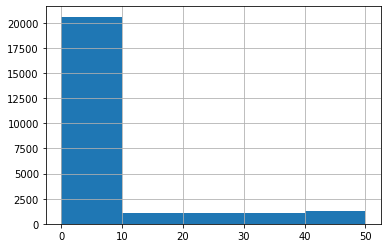

In [10]:
internet['mb_used'].hist(bins=5, range=(0, 50));

Не принимаю предположение о пороговом значении в 0.03Мб, т.к. на промежутке от 0.01 до 0.02 не может быть сосредоточено 13% всех интернет-сессий, слишком большое значение. Проверю зависимость появления нулей от даты сессии, может, был какой-то сбой при обработке.

In [11]:
print(internet.query('mb_used == 0').groupby('session_date')['session_date'].unique().count())

364


Нули встречаются по всем датам года, поэтому предположение о техническом сбое можно отвергнуть.

Проверю уникальность нулевых сессий, может, нулевые сессии - это уже загруженные страницы в кэш или что-то подобное, в этом случае у нулевых сессий будет идентичный `session_id`. Проверю гипотезу. Посчитаю количество уникальных `session_id` и сравню с длиной всего списка. Если значения равны, то номера нулевых сессий уникальны и гипотеза подтверждена не будет. 

In [12]:
print('Гипотеза о том, что нулевая сессия - это продолжение ранее запущенной сессии')
if len(internet) == len(internet['session_id'].unique()):
    print('не подтверждена!')
else:
    print('нуждается в дополнительной проработке')

Гипотеза о том, что нулевая сессия - это продолжение ранее запущенной сессии
не подтверждена!


Т.к. не подтвердилось ни одно предположение, скорее всего - это ошибочные сессии, заполнить нули в столбце длительность интернет-сессий не удается ни по какому принципу, а нулевые значения могут повлиять на результаты анализа при анализе трафика, принимаю решение исключить строки с нулевыми значениями из выборки.

In [13]:
print('Исходное количество строк -', len(internet))
internet = internet.query('mb_used != 0')
internet = internet.reset_index(drop=True)
print('После удаления -', len(internet), )

Исходное количество строк - 149396
После удаления - 129798


Перестрою гистограмму распределения:

count    129798.0
mean        426.0
std         256.0
min           0.0
25%         227.0
50%         401.0
75%         593.0
max        1725.0
Name: mb_used, dtype: float64


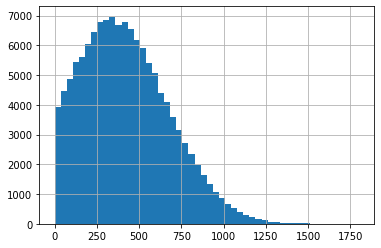

In [14]:
print(round(internet['mb_used'].describe()))
internet['mb_used'].hist(bins=50, range=(0, 1800));

Рассмотрим полученные графики и описательную таблицу:

* по гистограмме видно, что теперь значения объема трафика за сессию в данных соответствуют действительности, т.к. распределение близко к нормальному.

* нижний «ус» диаграммы размаха упирается в 0, минимальное значение, верхний заканчивается около 1150 Мб это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много. И всё же значения, которые отсёк верхний «ус» — редкие. Видно, насколько медиана (426 Мб) не стремится к длинному хвосту высоких значений.

* в основном, пользователи используют от 227 до 593 Мб за одну интернет-сессию.

#### Обработка данных в столбце duration

Проанализирую значения длительности звонков в таблице `calls`:

count    202607.0
mean          7.0
std           6.0
min           0.0
25%           1.0
50%           6.0
75%          11.0
max          38.0
Name: duration, dtype: float64


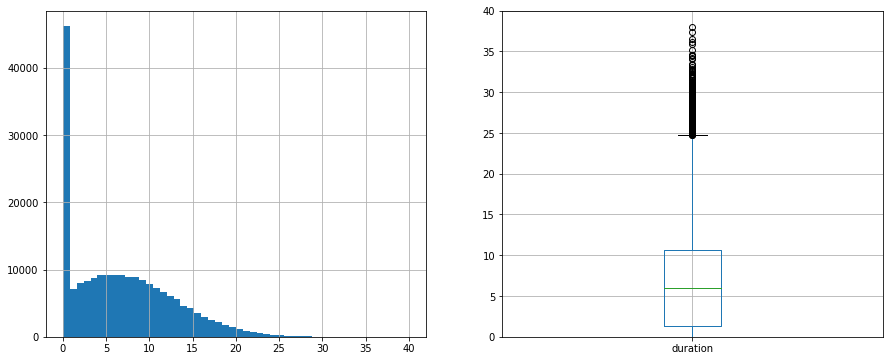

In [15]:
print(round(calls['duration'].describe()))

fig, axes = plt.subplots(1,2,figsize=(15,6))
calls['duration'].hist(bins=50, range=(0, 40), ax=axes[0])
calls.boxplot(('duration'), ax=axes[1])
plt.ylim(0, 40);

Выброс в нуле - это не ошибка, а пропущенные звонки, их буду обрабатывать отдельно во избежание искажения статистики. Отсеку пропущенные звонки и построю гистограмму снова.

count    162994.0
mean          8.0
std           5.0
min           0.0
25%           4.0
50%           8.0
75%          12.0
max          38.0
Name: duration, dtype: float64


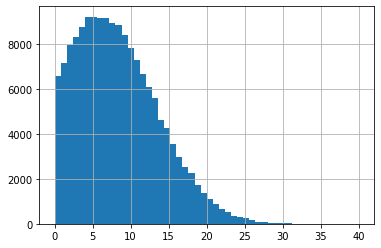

In [16]:
print(round(calls.query('duration != 0')['duration'].describe()))

calls.query('duration != 0')['duration'].hist(bins=50, range=(0, 40));

Проанализируем полученные графики и описательную таблицу:

* по гистограмме видно, что длительность звонков в данных соответствуют действительности, т.к. распределение близко к нормальному.

* нижний «ус» диаграммы размаха стремится к 0 - минимальному значению, верхний заканчивается около 25 минут - это ориентировочная граница нормального размаха. Всё, что лежит за ней - выбросы и их большое количество. И всё же значения, которые отсёк верхний «ус» — редкие. Видно, насколько медиана (7 минут) не стремится к длинному хвосту высоких значений.

* в основном, продолжительность звонков составляет от 1 до 11 минут.

#### Выводы по разделу

В результате проведенной работы выполнено переименование столбцов таблиц в соответствии с их содержимым и удаление ошибочных стобцов. Обнаруженные ошибочные записи в столбце `mb_used` таблицы `internet`, а именно, нулевые интернет-сессии были исключены из анализа.

### Расчеты

Т.к. для моих расчетов понадобится группировка по месяцам, то добавлю в таблицы колонки `month`. Построю распределение значений по необходимым параметров по месяцам:

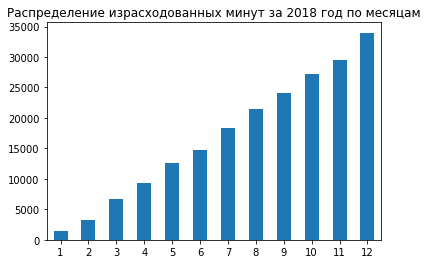

In [17]:
calls['month'] = calls['call_date'].dt.month
calls['month'].value_counts().sort_values().plot.bar(rot=0, title='Распределение израсходованных минут за 2018 год по месяцам');

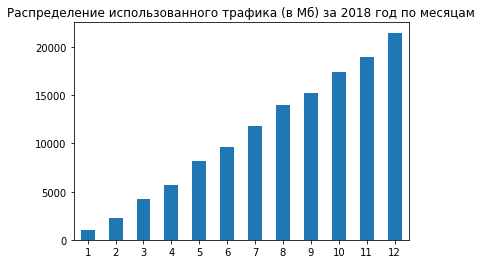

In [18]:
internet['month'] = internet['session_date'].dt.month
internet['month'].value_counts().sort_values().plot.bar(rot=0, title='Распределение использованного трафика (в Мб) за 2018 год по месяцам');

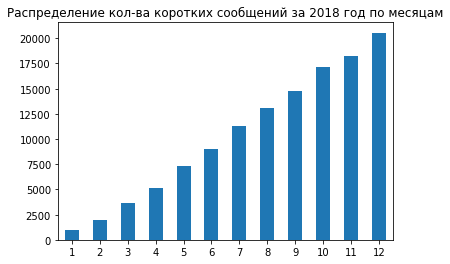

In [19]:
messages['month'] = messages['message_date'].dt.month
messages['month'].value_counts().sort_values().plot.bar(rot=0, title='Распределение кол-ва коротких сообщений за 2018 год по месяцам');

Из данных гистограмм можно сделать вывод о том, что от месяца к месяцу наблюдается явное увеличение по всем трем наблюдаемым параметрам: израсходованных минут, отправленных смс и использованному трафику. Значит. у компании все идет хорошо и выбрана правильная стратегрия развития.

#### Расчет данных для каждого пользователя по месяцам

Учитывая условие, что компания всегда округляет секунды до минут, при чем каждый звонок округляется отдельно (даже если он длился всего 1 секунду, будет засчитан как 1 минута), прежде чем рассчитывать помесячную длительность, необходимо провести округление длительности звонков до минут. 
И уже далее, после занесения данных в таблицу, общий месячный интернет-трафик округлить в бо́льшую сторону — до гигабайт (разделю на 1024, чтобы получить гигабайты, округлю в бо́льшую сторону до целого и далее домножу снова на 1024, чтобы получить значение в мегабайтах), т.к. по условию - отдельные сессии веб-трафика не считаются.

In [20]:
print('ДЛЯ КАЖДОГО ПОЛЬЗОВАТЕЛЯ')

# Расчет количества сделанных звонков и израсходованных минут разговора
print('количество выполненных звонков и израсходованных минут:')
calls['duration'] = np.ceil(calls['duration']).astype(int)
calls = calls.groupby(['user_id', 'month']).agg({'call_id': 'count', 'duration': 'sum'}).reset_index()
print(calls.head())
print()

# Расчет количества отправленных сообщений
print('количество отправленных сообщений:')
messages = messages.groupby(['user_id', 'month']).agg({'message_id': 'count'}).reset_index()
print(messages.head())
print()

# Расчет израсходованного интернет-трафика
print('израсходованного интернет-трафика:')
internet = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
internet['mb_used'] = np.ceil(internet['mb_used'] / 1024).astype(int) * 1024
print(internet.head())

ДЛЯ КАЖДОГО ПОЛЬЗОВАТЕЛЯ
количество выполненных звонков и израсходованных минут:
   user_id  month  call_id  duration
0     1000      5       22       159
1     1000      6       43       172
2     1000      7       47       340
3     1000      8       52       408
4     1000      9       58       466

количество отправленных сообщений:
   user_id  month  message_id
0     1000      5          22
1     1000      6          60
2     1000      7          75
3     1000      8          81
4     1000      9          57

израсходованного интернет-трафика:
   user_id  month  mb_used
0     1000      5     3072
1     1000      6    23552
2     1000      7    14336
3     1000      8    14336
4     1000      9    15360


#### Формирование рабочей таблицы для проведения вычислений

Для выполнения необходимых вычислений мне нужна таблица, объединяющая данные всех таблиц: `calls`, `messages`, `internet`, `tariffs` и `user_id`. Выполню объединение и исключу неинформативные столбцы:

In [21]:
final = calls.merge(internet, on=['user_id', 'month'], how='outer')
final = final.merge(messages, on=['user_id', 'month'], how='outer')
final = final.merge(users, on=['user_id'], how='left')
final = final.merge(tariffs, on=['tariff_name'], how='left')
final.drop(['first_name', 'last_name'], axis=1, inplace=True)
display(final.head())
print()
final.info()

,user_id,month,call_id,duration,mb_used,message_id,age,churn_date,city,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,3072.0,22.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,23552.0,60.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,14336.0,75.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,14336.0,81.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,15360.0,57.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 18 columns):
user_id                  3214 non-null object
month                    3214 non-null int64
call_id                  3174 non-null float64
duration                 3174 non-null float64
mb_used                  3201 non-null float64
message_id               2717 non-null float64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff_name              3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(9), objec

В сформированной таблице вижу следующие ошибки:
* пропущенные значения в столбцах `call_id`, `mb_used`, `duration`, `message_id`. Это значит, что в данном месяце данный пользователь не использовал интернет, не совершал звонки (или только принимал) или не отсылал короткие смс-сообщения соответственно. Все пропущенные данные буду заменять нулями, т.к. в противном случае они обработаны не будут. Пропуски в столбце `churn_date`, как уже было обозначено ранее - это значит, что тариф ещё действовал на момент выгрузки данных.
* вещественный тип данных `float64` для столбцов `call_id`, `message_id`, `duration` и `mb_used` необходимо заменить на целочисленный - `int`, т.к. проводилось округление по условиям тарифов.

In [22]:
# Заполнение пропусков
values = ['call_id', 'mb_used', 'duration', 'message_id']
for element in values:
    final.loc[final[element].isna(), element] = 0
# Проверка    
final[['call_id', 'mb_used', 'duration', 'message_id']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 4 columns):
call_id       3214 non-null float64
mb_used       3214 non-null float64
duration      3214 non-null float64
message_id    3214 non-null float64
dtypes: float64(4)
memory usage: 125.5 KB


In [23]:
values = ['call_id', 'message_id', 'duration', 'mb_used']
for element in values:
    print('Исходный тип данных:')
    print(element, '-', final[element].dtypes)

# Приведение столбцов в строковый формат
    final[element] = final[element].astype('int')

# Проверка
    print('После изменения:')
    print(element, '-', final[element].dtypes)
    print()

Исходный тип данных:
call_id - float64
После изменения:
call_id - int64

Исходный тип данных:
message_id - float64
После изменения:
message_id - int64

Исходный тип данных:
duration - float64
После изменения:
duration - int64

Исходный тип данных:
mb_used - float64
После изменения:
mb_used - int64



#### Расчет помесячной выручки с пользователей

mb_used	message_id	age	churn_date	city	tariff_name	messages_included	mb_per_month_included	minutes_included	rub_monthly_fee	rub_per_gb	rub_per_message	rub_per_minute

Для расчета помесячной выручки с каждого пользователя необходимо:
* вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика;
* остаток умножить на значение из тарифного плана;
* прибавить абонентскую плату, соответствующую тарифному плану.

In [24]:
# Добавляю разницу между фактическими значениями параметров и включенными в тариф
final['min'] = final['minutes_included'] - final['duration']
final['int'] = final['mb_per_month_included'] - final['mb_used']
final['sms'] = final['messages_included'] - final['message_id']
#print(final)

In [25]:
print('Доля месяцев, в которые пользователи не уложились в тариф')
print('по количеству израсходованных минут - {:.1%}'.format(len(final.query('min < 0')) / len(final)))
print('по количеству отправленных sms - {:.1%}'.format(len(final.query('sms < 0')) / len(final)))
print('по количеству израсходованного интернет-трафика - {:.1%}'.format(len(final.query('int < 0')) / len(final)))

Доля месяцев, в которые пользователи не уложились в тариф
по количеству израсходованных минут - 23.5%
по количеству отправленных sms - 17.5%
по количеству израсходованного интернет-трафика - 44.7%


Можно сделать вывод, что почти половина пользователей "не влезает" в тариф по количеству предоставляемого в пакете интернета, четверти пользователей не хватает количества предоставляемых минут разговора, а доля людей, которые отправляют sms-ки сверх пакета, достаточно мала и составляет всего 17.5%.

In [26]:
# Для всех отрицательных значений (превышение лимита) посчитаю добавления по тарифу:
final.loc[final['min'] >= 0, 'min'] = 0
final.loc[final['min'] < 0, 'min'] = (final['min'].abs()) * final['rub_per_minute']

final.loc[final['int'] >= 0, 'int'] = 0
final.loc[final['int'] < 0, 'int'] = (np.ceil(final['int'] / 1024).abs().astype(int)) * final['rub_per_gb']

final.loc[final['sms'] >= 0, 'sms'] = 0
final.loc[final['sms'] < 0, 'sms'] = (final['sms'].abs()) * final['rub_per_message']

In [27]:
# Добавляю абонентскую плату
final['revenue'] = final['min'] + final['int'] + final['sms'] + final['rub_monthly_fee']
# Оставлю в таблице только те столбцы, которые будут использованы в исследовании
final = final[['user_id', 'month', 'call_id', 'duration', 'mb_used', 'message_id', 'age', 'city', 'tariff_name', 'revenue']]
final = final.rename(columns={'message_id': 'sms_count', 'call_id': 'calls_count'})

#### Вывод по разделу

Сформирована таблица, в которой содержатся все данные помесячно по каждому пользователю: сколько в месяц потрачено минут, сколько отправлено коротких сообщений и сделано звонков и сколько израсходовано интернет-трафика. Также в сводной таблице отражены данные возраста пользователя, из какого он города, наименование тарифа, который он использует, и сколько в месяц он заплатил за связь с учетом того, хватило ли ему услуг, включенных в абонентскую плату или нет. Таблица, с которой я буду работать, выглядит следующим образом:

In [28]:
display(final.head())

,user_id,month,calls_count,duration,mb_used,sms_count,age,city,tariff_name,revenue
0,1000,5,22,159,3072,22,52,Краснодар,ultra,1950
1,1000,6,43,172,23552,60,52,Краснодар,ultra,1950
2,1000,7,47,340,14336,75,52,Краснодар,ultra,1950
3,1000,8,52,408,14336,81,52,Краснодар,ultra,1950
4,1000,9,58,466,15360,57,52,Краснодар,ultra,1950


### Анализ данных

Опишу поведение клиентов оператора, исходя из выборки. Подсчитаю, сколько минут разговора, сколько сообщений, какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. А также помесячную выручку с каждого тарифа.

In [29]:
months = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']

print('Распределение кол-ва минут разговора для различных тарифов:')
pivot_duration = final.pivot_table(index='tariff_name', columns='month', values='duration', aggfunc='sum')
pivot_duration.columns = months
for element in months:
    pivot_duration[element] = pivot_duration[element].astype('object')
display(pivot_duration)
print()

print('Распределение кол-ва отправленных сообщений для различных тарифов:')
pivot_sms = final.pivot_table(index='tariff_name', columns='month', values='sms_count', aggfunc='sum')
pivot_sms.columns = months
for element in months:
    pivot_sms[element] = pivot_sms[element].astype('object')
display(pivot_sms)
print()

print('Распределение объема израсходованного интернет-трафика для различных тарифов (в Гб):')
pivot_internet = final.pivot_table(index='tariff_name', columns='month', values='mb_used', aggfunc='sum')
pivot_internet.columns = months
for element in months:
    pivot_internet[element] = pivot_internet[element].astype('object') / 1024
display(pivot_internet)

print('Помесячная выручка пользователей тарифов (в рублях):')
pivot_revenue = final.pivot_table(index='tariff_name', columns='month', values='revenue', aggfunc='sum')
pivot_revenue.columns = months
for element in months:
    pivot_revenue[element] = pivot_revenue[element].astype('object')
display(pivot_revenue)

Распределение кол-ва минут разговора для различных тарифов:


,Янв,Фев,Мар,Апр,Май,Июн,Июл,Авг,Сен,Окт,Ноя,Дек
tariff_name,,,,,,,,,,,,
smart,6931,17324,30034,41119,54618,64885,82079,99045,111439,125284,137544,161275
ultra,3853,7131,18117,25191,34192,40295,49667,54653,62036,68644,72545,82400



Распределение кол-ва отправленных сообщений для различных тарифов:


,Янв,Фев,Мар,Апр,Май,Июн,Июл,Авг,Сен,Окт,Ноя,Дек
tariff_name,,,,,,,,,,,,
smart,620,1397,2453,3443,4762,5478,6784,7905,8746,9927,10768,12130
ultra,304,527,1195,1736,2536,3505,4536,5183,6013,7187,7476,8425



Распределение объема израсходованного интернет-трафика для различных тарифов (в Гб):


,Янв,Фев,Мар,Апр,Май,Июн,Июл,Авг,Сен,Окт,Ноя,Дек
tariff_name,,,,,,,,,,,,
smart,297,687,1173,1526,2243,2616,3191,3933,4262,4963,5372,6134
ultra,119,288,653,933,1298,1591,1866,2097,2213,2468,2654,3022


Помесячная выручка пользователей тарифов (в рублях):


,Янв,Фев,Мар,Апр,Май,Июн,Июл,Авг,Сен,Окт,Ноя,Дек
tariff_name,,,,,,,,,,,,
smart,24525,48001,89676,107866,168849,197459,246014,310340,324986,401267,424403,531965
ultra,17550,47400,74550,110100,138000,171300,192750,222900,232800,254100,280350,297300


Посчитаю среднее количество, дисперсию и среднеквадратическое отклонение по исследуемым параметрам. Для этого выберу пользователей определенного тарифа и посчитаю параметры:

In [30]:
final_ultra = final.query('tariff_name == "ultra"')
final_smart = final.query('tariff_name == "smart"')
final_ultra.name = 'ULTRA'
final_smart.name = 'SMART'
bases = [final_ultra, final_smart]
values = ['duration', 'mb_used', 'sms_count', 'revenue']

def parameters(db, value):
    for element in db:
        print(element.name)
        for value in values:
            print(value, '-', 'mean / var / std')
            print(round(element[value].mean()), '/', round(element[value].var()), '/', round(element[value].std()))
        print() 

parameters(bases, values)

ULTRA
duration - mean / var / std
527 / 100874 / 318
mb_used - mean / var / std
19962 / 101808012 / 10090
sms_count - mean / var / std
49 / 2285 / 48
revenue - mean / var / std
2070 / 141517 / 376

SMART
duration - mean / var / std
418 / 36219 / 190
mb_used - mean / var / std
16721 / 34633108 / 5885
sms_count - mean / var / std
33 / 797 / 28
revenue - mean / var / std
1290 / 669786 / 818



Выведу эти значения в таблицах для наглядности:

In [31]:
print('Данные тарифа SMART:')
display(final.query('tariff_name == "smart"')[['duration', 'mb_used', 'sms_count', 'revenue']].describe().T.style.format('{:.2f}'))
print('Данные тарифа ULTRA:')
display(final.query('tariff_name == "ultra"')[['duration', 'mb_used', 'sms_count', 'revenue']].describe().T.style.format('{:.2f}'))

Данные тарифа SMART:


,count,mean,std,min,25%,50%,75%,max
duration,2229.00,417.93,190.31,0.00,282.00,422.00,545.00,1435.00
mb_used,2229.00,16720.74,5884.99,0.00,13312.00,17408.00,20480.00,38912.00
sms_count,2229.00,33.38,28.23,0.00,10.00,28.00,51.00,143.00
revenue,2229.00,1289.97,818.40,550.00,550.00,1023.00,1750.00,6770.00


Данные тарифа ULTRA:


,count,mean,std,min,25%,50%,75%,max
duration,985.00,526.62,317.61,0.00,284.00,518.00,752.00,1673.00
mb_used,985.00,19962.28,10090.00,0.00,12288.00,19456.00,27648.00,50176.00
sms_count,985.00,49.36,47.80,0.00,6.00,38.00,79.00,224.00
revenue,985.00,2070.15,376.19,1950.00,1950.00,1950.00,1950.00,4800.00


Построю гистограммы распределения параметров:

Гистограммы распределения минут разговора на различных тарифах:


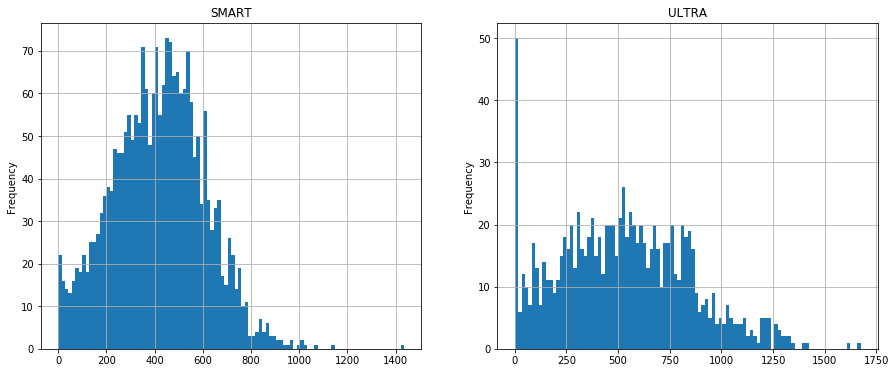

In [32]:
def hist(parametr, bins):
    fig, axes = plt.subplots(1,2,figsize=(15,6))
    final_smart[parametr].plot(kind='hist', bins=bins, title=final_smart.name, grid=True, ax=axes[0])
    final_ultra[parametr].plot(kind='hist', bins=bins, title=final_ultra.name, grid=True, ax=axes[1]);

print('Гистограммы распределения минут разговора на различных тарифах:')
hist('duration', 100)    

Гистограммы распределения минут разговора на различных тарифах:


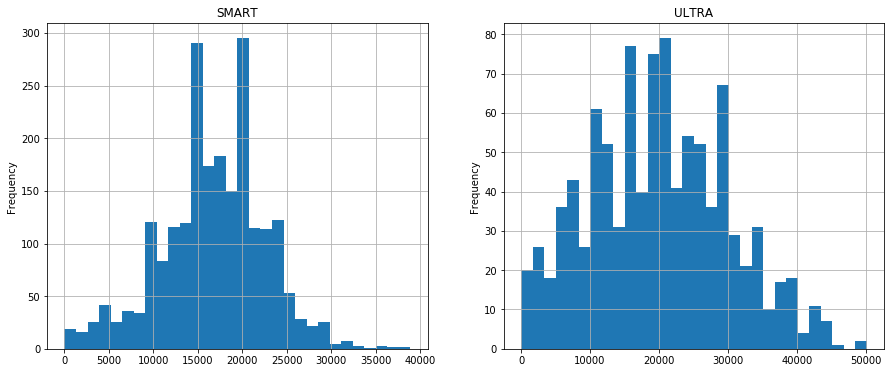

In [33]:
print('Гистограммы распределения минут разговора на различных тарифах:')
hist('mb_used', 30)

Гистограммы распределения отправленных sms на различных тарифах:


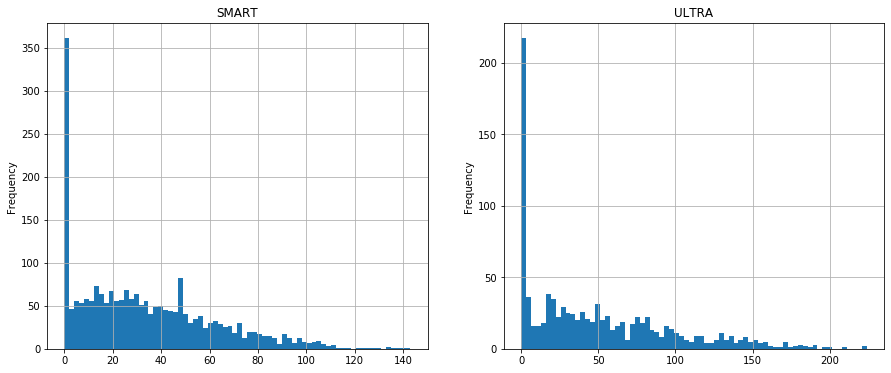

In [34]:
print('Гистограммы распределения отправленных sms на различных тарифах:')
hist('sms_count', 70)

Гистограммы распределения месячной выручки на различных тарифах:


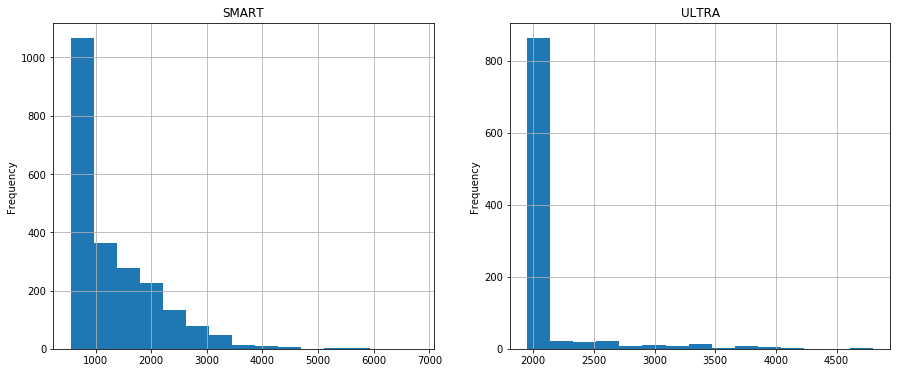

In [35]:
print('Гистограммы распределения месячной выручки на различных тарифах:')
hist('revenue', 15)

Построю дополнительные сравнительные графики, которые покажут различия тарифов по средним значениям параметров:

Средние значение по месяцам в зависимости от тарифа:


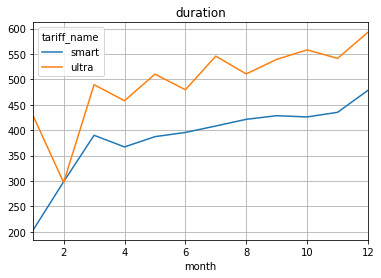

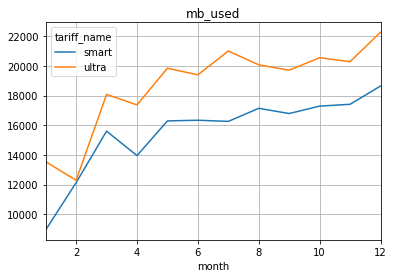

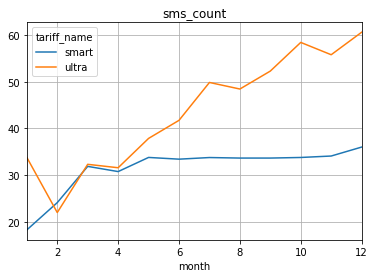

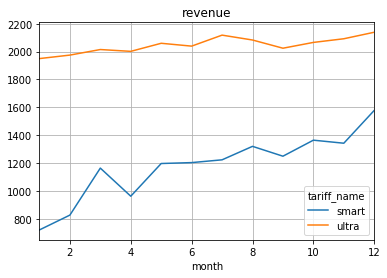

In [36]:
values = ['duration', 'mb_used', 'sms_count', 'revenue']
print('Средние значение по месяцам в зависимости от тарифа:')
for element in values:
    final.pivot_table(index='month', columns='tariff_name', values=element, aggfunc='mean').plot(grid=True, title=element)

#### Выводы по разделу

Сформировав свобную таблицу и построив с ее помощью гистограммы распределения и сравнительные графики, можно сделать следующие выводы:
* на данный момент пользователи тарифа ULTRA приносят компании бо́льшую прибыль, чем пользователи тарифа SMART (среднее значение по месячной выручке отличается почти вдвое), однако к концу года неметилась небольшая тенденция к повышению выручки у пользователей тарифа SMART);
* пользователи обоих тарифов практически не используют короткие sms сообщения, это и понятно, технологии шагнули вперед, сейчас отдается предпочтение онлайн-мессенджерам, однако существуют различия поведения пользователей в зависимости от тарифа: на тарифе ULTRA смс-ками с апреля месяца начали пользоваться чаще, тагда у пользователей тарифа SMART среднее значение отправленных сообщений с апреля по декабрь осталось практически неизменным;
* больше минут разговора и интернет-трафика также расходуют владельцы сим-карт с тарифом ULTRA;
* пользователи тарифа ULTRA склонны тратить больше минут, смс и интернет-трафика по отношению к среднему значению, в отличие о пользователей тарифа SMART, которые делают это с меньшей охотой, что выявлено по значеню среднеквадратического отклонения, которое по этим параментра практически вдвое больше у тарифа ULTRA, чем у SMART.
* однако ползователи тарифа SMART склонны тратить больше денег на дополнительные услуги, скорее всего это связано с тем, что пакета услуг, включенных в абонентскую плату, не хватает на месяц и приходится докупать;
* по всем параметрам наблюдается тенденция к увеличению показателей компании, а именно, от месяца к месяцу на обоих тарифах увеличивается количество совершенных звонков, израсходованных мегабайт трафика, а также растут показатели среднемесячной выручки, что говорит о том, что компания выбрала правильный путь развития.

### Проверка гипотез

В этом разделе я буду проверять следующие гипотезы:

* Гипотеза №1 - средняя выручка пользователей тарифов ULTRA и SMART различаются;
* Гипотеза №2 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

#### Проверка гипотезы №1

Проверка гипотез начинается с формулировки нулевой гипотезы H₀.

Для того, чтобы проверить, различается ли средняя выручка пользователей тарифов ULTRA и SMART, необходимо сформулировать нулевую гипотезу, которую нужно подтвердить или отвергнуть в пользу альтернативной гипотезы.

H₀ всегда формулируется так, чтобы использовать знак равенства, чтобы все данные лежали в районе изначально предполагаемого значения.

Поэтому нулевая гипотеза H₀ будет звучать так:
* Средняя выручка пользователей тарифов ULTRA и SMART равна

Альтернативную гипотезу H₁ сформулирую так:
* Средняя выручка пользователей тарифов ULTRA и SMART различна

In [37]:
# Дополнительные данные для проверки использования t-теста
print('Размер выборки ULTRA -', len(final_ultra))
print('Размер выборки SMART -', len(final_smart))
print()
print('Дисперсия выборки ULTRA -', round(final_ultra['revenue'].var()))
print('Дисперсия выборки SMART -', round(final_smart['revenue'].var()))

Размер выборки ULTRA - 985
Размер выборки SMART - 2229

Дисперсия выборки ULTRA - 141517
Дисперсия выборки SMART - 669786


Т.к. в данном случае речь идет о проверке гипотезы о равенстве средних двух генеральных совокупностей, то я применю t-тест (метод `scipy.stats.ttest_ind`).
Для применения t-теста необходимо выполнение 3 условий:
* генеральные совокупности не должны зависеть друг от друга - выполняется, т.к. мы рассматриваем 2 группы пользователей, использующих 2 разных тарифа - это независимые совокупности;
* выборочные средние должны быть нормально распределены
Это условие не препятствие. Размеры выборок достаточно велики (985 и 2229 значений), поэтому выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. Это утверждение верно, даже если сама генеральная совокупность не распределена нормально.
* дисперсии рассматриваемых генеральных совокупностей должны быть равны. 
Я буду использовать параметр `equal_var = False`, потому что выборки разного размера, дисперсии у генеральных совокупностей разные. Однако выборки достаточно велики: симуляции, проведённые учёными, показывают, что даже если дисперсии на самом деле не равны, при большом объеме выборки выборочное среднее становится нормально распределенным и тест может быть применен.

Критический уровень статистической значимости я выберу 0.5%, т.к. мы имеем большие выборки, измеряемые тысячами наблюдений, поэтому уверенно отвергать нулевую гипотезу можно только при значимости меньшей 0,005.

In [41]:
# Задаю критический уровень статистической значимости
alpha = 0.005
# если p-value окажется меньше alpha - отвегаю нулевую гипотезу

results = st.ttest_ind(
    final_ultra['revenue'], 
    final_smart['revenue'],
    equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза не может быть отвергнута') 

p-значение:  4.2606313931076085e-250
Нулевая гипотеза отвергается


Т.к. p-значение оказалось настолько мало (стремится к 0), что ниже критического уровня статистической значимости, то отвергаю нулевую гипотезу в пользу альтернативной и делаю вывод, что между тарифами ULTRA и SMART есть разница в средней выручке.

#### Проверка гипотезы №2

Нулевая гипотеза H₀ будет звучать так:
* Средняя выручка пользователей из Москвы равна выручке пользователе из других регионов

Альтернативную гипотезу H₁ сформулирую так:
* Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [39]:
# Дополнительные данные для проверки использования t-теста
final_msk = final.query('city == "Москва"')
final_regions = final.query('city != "Москва"')
print('Размер выборки МОСКВА -', len(final_msk))
print('Размер выборки РЕГИОНЫ -', len(final_regions))
print()
print('Дисперсия выборки МОСКВА -', round(final_msk['revenue'].var()))
print('Дисперсия выборки РЕГИОНЫ -', round(final_regions['revenue'].var()))

Размер выборки МОСКВА - 611
Размер выборки РЕГИОНЫ - 2603

Дисперсия выборки МОСКВА - 565636
Дисперсия выборки РЕГИОНЫ - 654138


In [40]:
# Задаю критический уровень статистической значимости
alpha = 0.005
# если p-value окажется меньше alpha - отвегаю нулевую гипотезу

results = st.ttest_ind(
    final_msk['revenue'], 
    final_regions['revenue'],
    equal_var=False)

print('p-значение: ', round(results.pvalue, 2))

if results.pvalue < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза не может быть отвергнута') 

p-значение:  0.53
Нулевая гипотеза не может быть отвергнута


Т.к. p-значение на порядки больше, чем заданный критический уровень статистической значимости, то нулевая гипотеза не может быть отвергнута в пользу альтернативной. Я делаю вывод, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

#### Выводы по разделу

В этом разделе проверены следующие гипотезы:

* Гипотеза №1 - средняя выручка пользователей тарифов ULTRA и SMART различаются - *подтверждена*;
* Гипотеза №2 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - *опровергнута*.

### Общий вывод

Получены файлы с информацией о данных 500 пользователей компании «Мегалайн»: ФИО, каким тарифом пользуются, сколько звонков и сообщений, а также сколько интернет-трафика каждый израсходовал за 2018 год. Также я располагаю данными о параметрах двух тарифных планах: «Смарт» и «Ультра».

На предварительном этапе обработки данных были проведены следующие действия:
* открытие и изучение исходных таличных данных;
* приведение типов данных;
* корректировка ошибок (переименование столбцов таблиц, удаление некорректных данных)

Использование интернет-трафика:
* 1150 Мб - это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. В основном, пользователи используют от 227 до 593 Мб за одну интернет-сессию.
Расходование минут разговора:
* 25 минут - это ориентировочная граница нормального размаха. Всё, что лежит за ней - выбросы и их большое количество. В основном, продолжительность звонков составляет от 1 до 11 минут.
Отправка коротких sms-сообщений:
* Короткие sms сообщения отправляют редко, это и понятно, технологии шагнули вперед, сейчас отдается предпочтение онлайн-мессенджерам.

Выявлено, что почти половина пользователей "не влезает" в тариф по количеству предоставляемого в пакете интернета, четверти пользователей не хватает количества предоставляемых минут разговора, а доля людей, которые отправляют sms-ки сверх пакета, достаточно мала и составляет всего 17.5%.

Было проанализировать поведение клиентов разных тарифов и сделаны следующие выводы:
* на данный момент пользователи тарифа ULTRA приносят компании бо́льшую прибыль, чем пользователи тарифа SMART (среднее значение по месячной выручке отличается почти вдвое), однако к концу года неметилась небольшая тенденция к повышению выручки у пользователей тарифа SMART);
* существуют различия в отправке sms у пользователей разных тарифов: на тарифе ULTRA смс-ками с апреля месяца начали пользоваться чаще, тагда у пользователей тарифа SMART среднее значение отправленных сообщений с апреля по декабрь осталось практически неизменным;
* больше минут разговора и интернет-трафика также расходуют владельцы сим-карт с тарифом ULTRA;
* пользователи тарифа ULTRA склонны тратить больше минут, смс и интернет-трафика по отношению к среднему значению, в отличие о пользователей тарифа SMART, которые делают это с меньшей охотой;
* однако ползователи тарифа SMART склонны тратить больше денег на дополнительные услуги, скорее всего это связано с тем, что пакета услуг, включенных в абонентскую плату, не хватает на месяц и приходится докупать;
* по всем параметрам наблюдается тенденция к увеличению показателей компании, а именно, от месяца к месяцу на обоих тарифах увеличивается количество совершенных звонков, израсходованных мегабайт трафика, а также растут показатели среднемесячной выручки, что говорит о том, что компания выбрала правильный путь развития.

В результате статистических тестов
* была подтверждена гипотеза о том, что средняя выручка пользователей тарифов ULTRA и SMART различаются;
* была опровергнута гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, сделан вывод, что средняя выручка в Москве и регионах равна.

В результате всех проведенных работ выявлено, что пользователи тарифа ULTRA приносят компании бо́льшую прибыль, тратят больше смс, минут и интренет-трафика, поэтому данный тариф является более перспективным для телеком-компании, чем тариф SMART, т.к. он приносит компании больше денег.